<a href="https://colab.research.google.com/github/rahiakela/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/blob/10-introduction-to-artificial-neural-networks-with-keras/1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs 
$$z = w1 x1 + w2 x2 + ⋯ + wn xn = x⊺ w$$
then applies a step function to that sum and outputs the result: hw(x) = step(z), where $$z = x⊺ w$$

<img src='https://github.com/rahiakela/img-repo/blob/master/threshold-logic-unit-1.JPG?raw=1' width='800'/>

The most common step function used in Perceptrons is the Heaviside step function.Sometimes the sign function is used instead.

$$heaviside ( z ) = 0 if z < 0 1 if z ≥ 0 sgn ( z ) = - 1 if z < 0 0 if z = 0 + 1 if z > 0 $$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier).

A Perceptron is simply composed of a single layer of TLUs,7 with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time.

<img src='https://github.com/rahiakela/img-repo/blob/master/threshold-logic-unit-2.JPG?raw=1' width='800'/>

This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

The Perceptron training algorithm proposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger.

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

Scikit-Learn provides a Perceptron class that implements a single-TLU network. It can be used pretty much as you would expect—for example, on the iris dataset.



In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# load IRIS dataset
iris = load_iris()

# petal length, petal width
X = iris.data[:, (2, 3)]
# Iris setosa?
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

y_pred

array([1])

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.

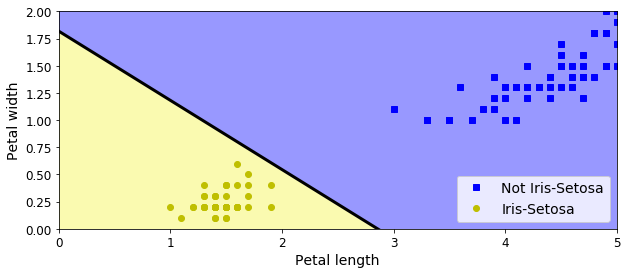

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem.

<img src='https://github.com/rahiakela/img-repo/blob/master/XOR-classification.JPG?raw=1' width='800'/>

It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP). An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown. 


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
    
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

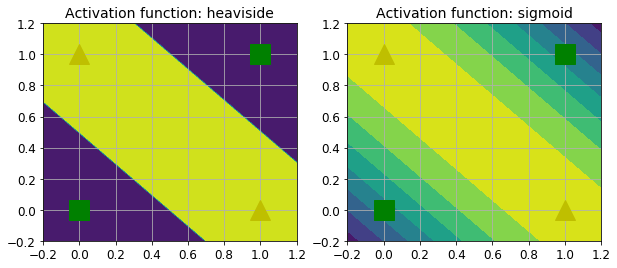

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)